# Projeto 1 - Ciência dos dados 

## Introdução

Há um grande movimento feito pelos países desenvolvidos para desacelerar a emissão de gases estufas como o gás carbonico (CO2), o metano (CH4) e o óxido nitroso (N2O). Para tanto, foram criados incentivos econômicos para que empresas e nações reduzissem as suas emissões; dentre esses, o mais conhecido são os "Créditos de Carbono"- moeda criada que premia as empresas que emitem menos toneladas de carbono. 

O presente trabalho se propõe a entender se: 

**É possível aumentar o IDH sem acentuar o uso de recursos naturais?** 


Para tentar explorar um pouco a pergunta, utilizamos dados extraídos do site Gapminder organizados em séries históricas sobre a emissão de CO2 por pessoa, consumo de energia por pessoa e IDH. 

In [119]:
#Importando as Bibliotecas necessárias
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Abrindo os dados de 2013:

In [120]:
#Lendo os dados do ano de 2013

dados_2013= pd.read_excel('dados_2013.xlsx')

dados_2013=dados_2013.set_index('geo')

#O ano de 2013 foi escolhido porque esse era um dos mais recentes que possuiam um maior número de países. 

#Tirando as linhas com NAN

dados_2013=dados_2013.dropna()

dados_2013.head()

,2013_idh,2013_co2,2013_energy
geo,,,
Albania,0.761,1.73,801.0
Algeria,0.741,3.51,1240.0
Angola,0.527,1.25,534.0
Argentina,0.825,4.46,1950.0
Armenia,0.739,1.90,1000.0


## Análises e explicação dos resultados

#### Fazendo um describe para cada uma das colunas do dataset:

,log_2013_co2,log_2013_idh
log_2013_co2,1.000000,0.868897
log_2013_idh,0.868897,1.000000


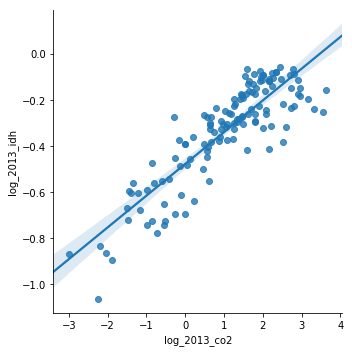

In [121]:
#Gerando o gráfico de dispersão e a tabela de correlação entre nível do IDH e emissão de CO2. 

#Criando colunas em escala logarítmica, uma vez que a correlação não fica tão evidente na escala geral. 

dados_2013['log_2013_idh']=np.log(dados_2013['2013_idh'])
dados_2013['log_2013_co2']=np.log(dados_2013['2013_co2'])
dados_2013['log_2013_energy']=np.log(dados_2013['2013_energy'])


sns.lmplot(x='log_2013_co2', y='log_2013_idh', data=dados_2013);

dados_2013.loc[:,['log_2013_co2','log_2013_idh']].corr()

Como observado no gráfico acima e também na tabela, há uma forte correlação positiva entre a emissão de CO2 e o IDH. Em outras palavras, os países com o maior IDH são também os que tem maior emissão de gases. 

,log_2013_energy,log_2013_idh
log_2013_energy,1.000000,0.820702
log_2013_idh,0.820702,1.000000


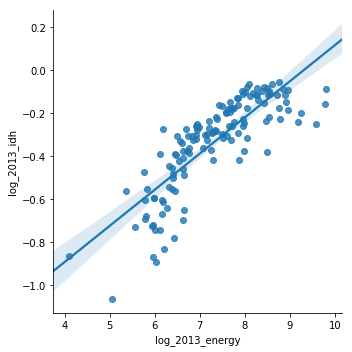

In [122]:
#Gerando o gráfico de dispersão e a tabela de correlação entre nível do IDH e emissão de CO2. 

sns.lmplot(x='log_2013_energy', y='log_2013_idh', data=dados_2013);

dados_2013.loc[:,['log_2013_energy','log_2013_idh']].corr()

Da mesma forma para o consumo de energia: Observamos uma grande correlação positiva entre o IDH e o consumo de energia por pessoa.



#### Observando os top 10 de cada subcategoria

In [123]:
#Organizando os 10 países com maior IDH
maior_idh= dados_2013.sort_values(by='2013_idh', ascending=False)
maior_idh.head(10)

,2013_idh,2013_co2,2013_energy,log_2013_idh,log_2013_co2,log_2013_energy
geo,,,,,,
Norway,0.945,11.50,6420.0,-0.056570,2.442347,8.767173
Switzerland,0.936,4.95,3300.0,-0.066140,1.599388,8.101678
Australia,0.936,16.10,5460.0,-0.066140,2.778819,8.605204
Denmark,0.926,6.83,3130.0,-0.076881,1.921325,8.048788
Netherlands,0.923,10.30,4600.0,-0.080126,2.332144,8.433812
Singapore,0.922,10.40,4880.0,-0.081210,2.341806,8.492900
Germany,0.920,9.32,3940.0,-0.083382,2.232163,8.278936
United States,0.916,16.40,6900.0,-0.087739,2.797281,8.839277
Iceland,0.915,5.81,18200.0,-0.088831,1.759581,9.809177


In [124]:
maior_co2= dados_2013.sort_values(by='2013_co2', ascending=False)
maior_co2.head(10)

,2013_idh,2013_co2,2013_energy,log_2013_idh,log_2013_co2,log_2013_energy
geo,,,,,,
Qatar,0.854,37.8,17900.0,-0.157824,3.632309,9.792556
Trinidad and Tobago,0.778,34.5,14500.0,-0.251029,3.540959,9.581904
Kuwait,0.787,27.3,9710.0,-0.239527,3.306887,9.180912
Bahrain,0.820,23.8,10400.0,-0.198451,3.169686,9.249561
Brunei,0.863,19.2,7500.0,-0.147341,2.954910,8.922658
United Arab Emirates,0.832,19.0,7770.0,-0.183923,2.944439,8.958025
Luxembourg,0.892,18.5,7310.0,-0.114289,2.917771,8.896999
Saudi Arabia,0.841,18.1,6420.0,-0.173164,2.895912,8.767173
Oman,0.796,16.5,6580.0,-0.228156,2.803360,8.791790


In [125]:
maior_energy= dados_2013.sort_values(by='2013_energy', ascending=False)
maior_energy.head(10)

,2013_idh,2013_co2,2013_energy,log_2013_idh,log_2013_co2,log_2013_energy
geo,,,,,,
Iceland,0.915,5.81,18200.0,-0.088831,1.759581,9.809177
Qatar,0.854,37.80,17900.0,-0.157824,3.632309,9.792556
Trinidad and Tobago,0.778,34.50,14500.0,-0.251029,3.540959,9.581904
Bahrain,0.820,23.80,10400.0,-0.198451,3.169686,9.249561
Kuwait,0.787,27.30,9710.0,-0.239527,3.306887,9.180912
United Arab Emirates,0.832,19.00,7770.0,-0.183923,2.944439,8.958025
Canada,0.912,14.70,7730.0,-0.092115,2.687847,8.952864
Brunei,0.863,19.20,7500.0,-0.147341,2.954910,8.922658
Luxembourg,0.892,18.50,7310.0,-0.114289,2.917771,8.896999


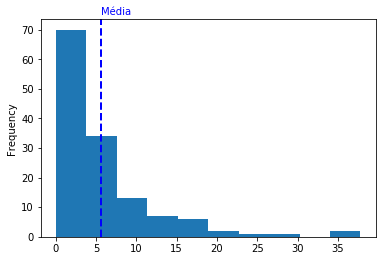

In [126]:
#Plotando histogramas 

plot = dados_2013['2013_co2'].plot.hist();

def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    
    
verticalLine(plot, dados_2013['2013_co2'].mean(), 75, "b", "Média")

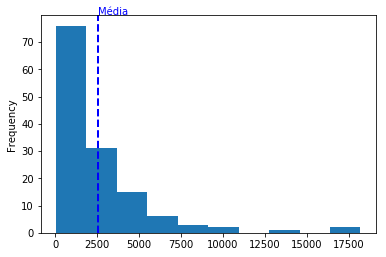

In [127]:
plot2=dados_2013['2013_energy'].plot.hist();

verticalLine(plot2, dados_2013['2013_energy'].mean(), 80, "b", "Média")

A assimetria à direita do histograma nos indica que há uma minoria de países cujo consumo de energia e emissão de CO2 por pessoa é muito maior do que a média e a mediana. 

## Conclusão

Os resultados observados indicam que de fato há uma relação forte entre um maior IDH e maior uso de recursos naturais. O que indica que um aumento na qualidade de vida acaba sendo reverberado no meio ambiente. 

Um fato curioso a ser futuramente pesquisado é "por que há um número tão grande de países Arabes no topo de emissão de CO2 e consumo de energia por pessoa"?

### Fontes: 

[Dados utilizados](https://www.gapminder.org)

[Sobre a teoria da conspiração do aquecimento global](https://goo.gl/cPg1Ri)